<a href="https://colab.research.google.com/github/Alla-tech/VKR/blob/main/%D0%92%D0%9A%D0%A0_%D1%87%D0%B0%D1%81%D1%82%D1%8C_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from tensorflow import keras as keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
import pickle

5. Нейронная сеть, рекомендующая соотношение матрица - наполнитель

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/resultpart_2.xlsx")

In [ ]:
Y_ns=np.array(df['Соотношение матрица-наполнитель'])
X_ns=np.array(df.drop(['Соотношение матрица-наполнитель'], axis=1))

In [ ]:
#Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(X_ns, Y_ns, test_size = 0.3, random_state = 1)

In [ ]:
#Нормализуем данные
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [ ]:
#Создаем модель
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
#создаем выходной слой
    model.add(Dense(3, activation='tanh')) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
    return model

In [ ]:
#Попытка определить лучшие значения для модели
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

layers = [[8],[16, 4],[32, 8, 2],[14, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)


<ipython-input-33-ede161fcc939>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=  11.0s
[CV] END ...........................................lyrs=[8]; total time=  11.0s
[CV] END ...........................................lyrs=[8]; total time=  11.3s
[CV] END ...........................................lyrs=[8]; total time=  10.9s
[CV] END ...........................................lyrs=[8]; total time=   9.6s
[CV] END ...........................................lyrs=[8]; total time=   9.8s
[CV] END ...........................................lyrs=[8]; total time=  11.0s
[CV] END ...........................................lyrs=[8]; total time=  11.0s
[CV] END ...........................................lyrs=[8]; total time=  11.0s
[CV] END ...........................................lyrs=[8]; total time=   9.7s
[CV] END .......................................lyrs=[16, 4]; total time=  11.0s
[CV] END .......................................

In [ ]:
# результаты
print("Значения: %f которые лучше использовать %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Значения: 0.002778 которые лучше использовать {'lyrs': [8]}
0.002778 (0.008333) with: {'lyrs': [8]}
0.001389 (0.004167) with: {'lyrs': [16, 4]}
0.002778 (0.008333) with: {'lyrs': [32, 8, 2]}
0.001389 (0.004167) with: {'lyrs': [14, 6, 3]}
0.001389 (0.004167) with: {'lyrs': [64, 64, 3]}
0.002778 (0.008333) with: {'lyrs': [128, 64, 16, 3]}


In [ ]:
#Построение модели
model = create_model(lyrs=[8], dr=0.05)

In [ ]:
#Посмотрим распределение признаков
print(model.summary())

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 8)                 112       
                                                                 
 dropout_61 (Dropout)        (None, 8)                 0         
                                                                 
 dense_223 (Dense)           (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Обучаем нейросеть, соотношение 80 на 20 CV
model_hist = model.fit(x_train, y_train, epochs = 100, verbose = 1, validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 22.9745 - mae: 2.8692 - accuracy: 0.0000e+00 - val_loss: 14.1276 - val_mae: 2.5081 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 13.5458 - mae: 2.5102 - accuracy: 0.0000e+00 - val_loss: 12.2823 - val_mae: 2.3666 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 11.8950 - mae: 2.4230 - accuracy: 0.0000e+00 - val_loss: 10.9197 - val_mae: 2.3199 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 10.5623 - mae: 2.3932 - accuracy: 0.0000e+00 - val_loss: 9.6859 - val_mae: 2.3025 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 9.3151 - mae: 2.3805 - accuracy: 0.0000e+00 - val_loss: 8.4984 - val_mae: 2.2959 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 8.0875 - mae: 

In [ ]:
#Оценка нейронной сети

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 2ms/step - loss: -4.5820 - mae: 2.3606 - accuracy: 0.0000e+00

mae: 236.06%


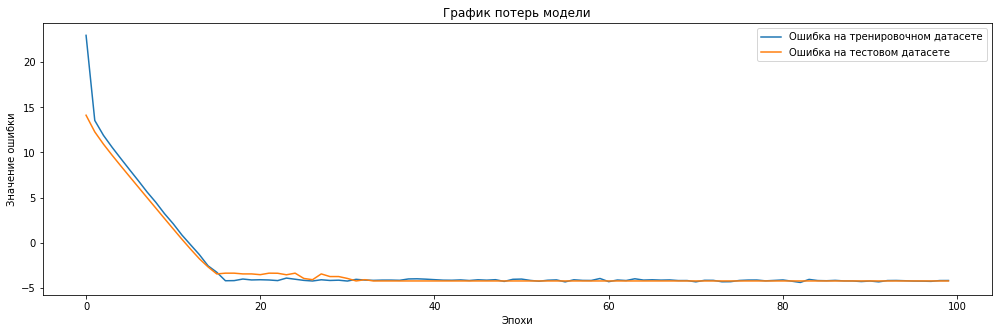

In [ ]:
#Оценка точности модели на тренировочном и тестовом датасетах
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на тренировочном датасете')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовом датасете')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на тренировочном датасете', 'Ошибка на тестовом датасете'], loc='best')
    plt.show()
model_loss_plot(model_hist)

In [ ]:
#Сохраняем модель
pickle.dump(model, open('model.pkl', 'wb'))